In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel('1613615-Stock_Price_data_set.xlsx')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [3]:
data.shape

(1009, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


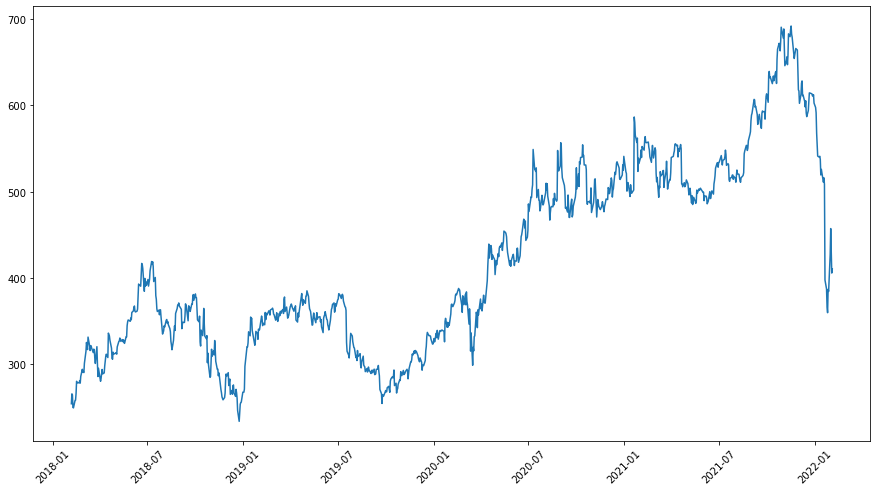

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(data['Date'], data['Adj Close'])
plt.xticks(rotation=45)
plt.show()

In [8]:
# Close Prices
close_prices = data['Adj Close'].values.reshape(-1, 1)

In [9]:
train_ratio = 0.8
train_len = int(close_prices.shape[0]*train_ratio)

In [10]:
# Scaling the data

scalar = StandardScaler()
scalar.fit(close_prices[:train_len])
scaled_data = scalar.transform(close_prices).flatten()

In [11]:
# X, y
T = 10
D = 1
X = []
Y = []
for t in range(len(scaled_data) - T):
    x = scaled_data[t:t+T]
    X.append(x)
    y = scaled_data[t+T]
    Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = int(len(X)*train_ratio)
print(f'X shape = {X.shape}\nY shape = {Y.shape}')

X shape = (999, 10, 1)
Y shape = (999,)


In [12]:
i = Input(shape=(T, 1))
x = LSTM(100)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
            loss = 'mse',
            optimizer=Adam(learning_rate=0.01))
r = model.fit(X[:N], Y[:N],
             epochs=80,
             validation_data=(X[N:], Y[N:]))

Epoch 1/80
25/25 [==============================] - 3s 35ms/step - loss: 0.1062 - val_loss: 0.2837
Epoch 2/80
25/25 [==============================] - 0s 9ms/step - loss: 0.0298 - val_loss: 0.2580
Epoch 3/80
25/25 [==============================] - 0s 13ms/step - loss: 0.0243 - val_loss: 0.2214
Epoch 4/80
25/25 [==============================] - 0s 10ms/step - loss: 0.0252 - val_loss: 0.1308
Epoch 5/80
25/25 [==============================] - 0s 11ms/step - loss: 0.0289 - val_loss: 0.1425
Epoch 6/80
25/25 [==============================] - 0s 11ms/step - loss: 0.0216 - val_loss: 0.1147
Epoch 7/80
25/25 [==============================] - 0s 11ms/step - loss: 0.0179 - val_loss: 0.0895
Epoch 8/80
25/25 [==============================] - 0s 11ms/step - loss: 0.0175 - val_loss: 0.0782
Epoch 9/80
25/25 [==============================] - 0s 10ms/step - loss: 0.0184 - val_loss: 0.0958
Epoch 10/80
25/25 [==============================] - 0s 11ms/step - loss: 0.0177 - val_loss: 0.0758
Epoch 11/8

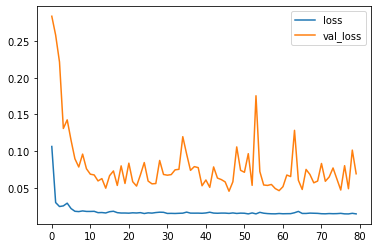

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

32/32 [==============================] - 1s 3ms/step
(999, 1)


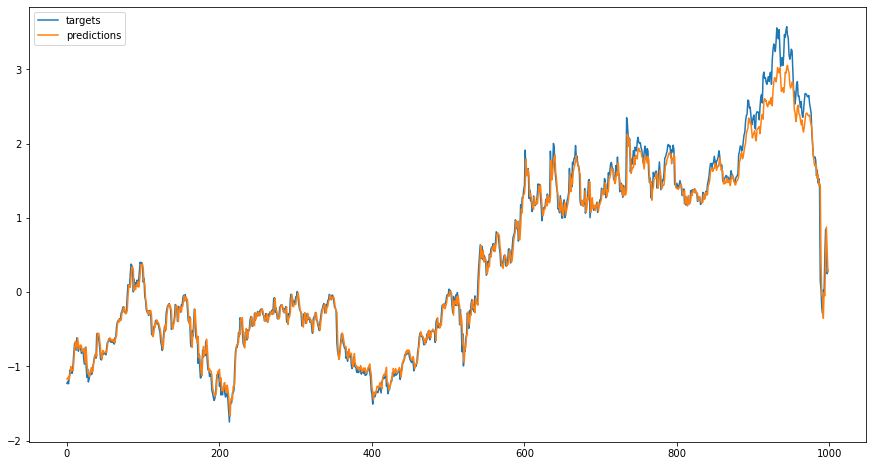

In [14]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.figure(figsize=(15,8))
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()